# Propagation of spike along the axon

this code performs basic simulation showing the propagation of action potential along axons for both unmyelinated and myelinated (saltatory conduction) fibers.

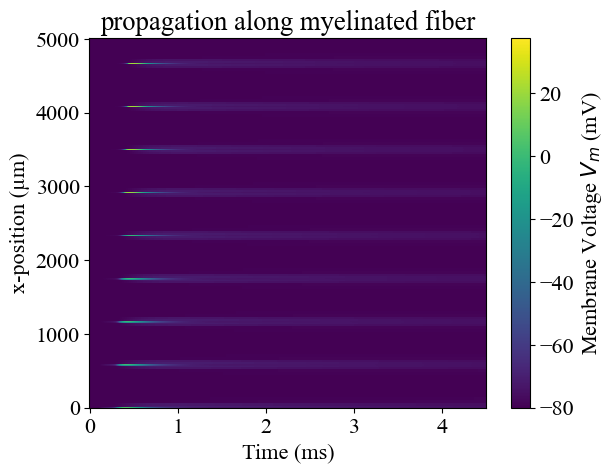

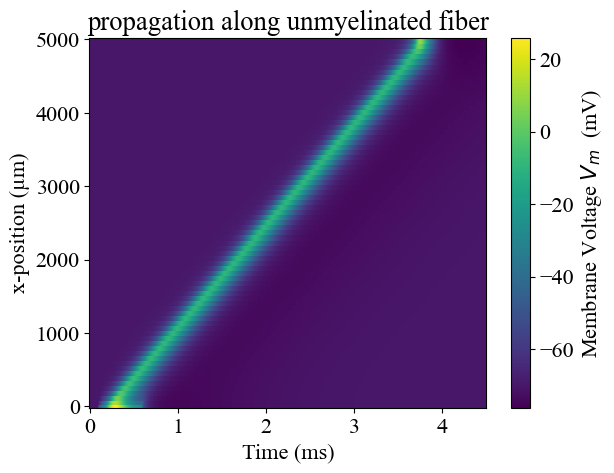

In [2]:
import nrv
import matplotlib.pyplot as plt

# axon def
y = 0						# axon y position, in [um]
z = 0						# axon z position, in [um]
d = 6						# axon diameter, in [um]
L = 5000					# axon length, along x axis, in [um]
axon1 = nrv.myelinated(y,z,d,L,rec='all')

t_start = 0.1
duration = 0.5
amplitude = 0.35

amplitude = 0.195
axon2 = nrv.unmyelinated(y,z,d,L,dt=0.001,Nrec=2000)
axon1.insert_I_Clamp(0, t_start, duration, amplitude)

amplitude = 10
axon2.insert_I_Clamp(0, t_start, duration, amplitude)


results = axon1.simulate(t_sim=4.5)
del axon1

plt.figure()
map = plt.pcolormesh(results['t'], results['x_rec'], results['V_mem'] ,shading='auto')
plt.xlabel('Time (ms)')
plt.ylabel('x-position (µm)')
plt.title('propagation along myelinated fiber')
cbar = plt.colorbar(map)
cbar.set_label('Membrane Voltage $V_m$ (mV)')

results = axon2.simulate(t_sim=4.5)
del axon2

plt.figure()
map = plt.pcolormesh(results['t'], results['x_rec'], results['V_mem'] ,shading='auto')
plt.xlabel('Time (ms)')
plt.ylabel('x-position (µm)')
plt.title('propagation along unmyelinated fiber')
cbar = plt.colorbar(map)
cbar.set_label('Membrane Voltage $V_m$  (mV)')

plt.show()